## Miles Voenell Coding HW#3 11/29

In [42]:
#1 A-C
import pandas as pd
import numpy as np

file_path = 'Grocery_Items_32.csv'
grocery_data = pd.read_csv(file_path, header=None)

# Flatten
all_items = grocery_data.values.flatten()

# Remove nan
all_items = [item for item in all_items if pd.notna(item) and item != ""]

#count # of unique
unique_items = set(all_items)
num_unique_items = len(unique_items)

#count # of transactions
num_records = len(grocery_data)

#most popular
item_counts = pd.Series(all_items).value_counts()
most_popular_item = item_counts.idxmax()
most_popular_item_count = item_counts.max()

num_unique_items, num_records, most_popular_item, most_popular_item_count


(177, 8001, 'whole milk', 1316)

## 1C
Number of Unique Items: 177
Number of Records (Transactions): 8001
Most Popular Item: whole milk
Most Popular Item Count (Transactions): 1316

In [ ]:
#1D

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
# Remove nan values
transactions = df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

#Apriori algorithm
te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_data, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.08, num_itemsets=len(frequent_itemsets))

#sorted by confidence
top_rules = rules.sort_values(by='confidence', ascending=False)
print(top_rules)


          antecedents         consequents  antecedent support  \
5            (yogurt)        (whole milk)            0.086489   
3        (rolls/buns)        (whole milk)            0.112236   
4              (soda)        (whole milk)            0.093613   
1  (other vegetables)        (whole milk)            0.122110   
0        (whole milk)  (other vegetables)            0.154356   
2        (whole milk)        (rolls/buns)            0.154356   

   consequent support   support  confidence      lift  representativity  \
5            0.154356  0.011874    0.137283  0.889395               1.0   
3            0.154356  0.013998    0.124722  0.808014               1.0   
4            0.154356  0.011124    0.118825  0.769813               1.0   
1            0.154356  0.014498    0.118731  0.769203               1.0   
0            0.122110  0.014498    0.093927  0.769203               1.0   
2            0.112236  0.013998    0.090688  0.808014               1.0   

   leverage  convi

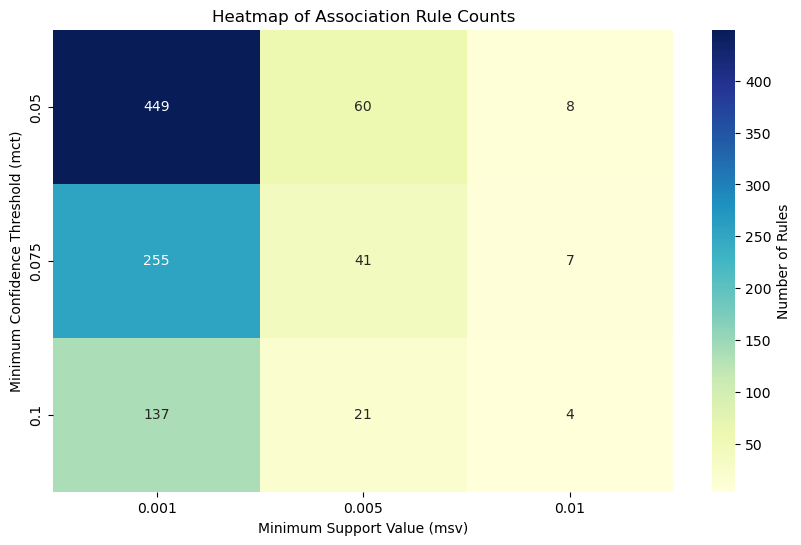

In [ ]:
#1E
import seaborn as sns
import matplotlib.pyplot as plt

#given values
msv_values = [0.001, 0.005, 0.01]
mct_values = [0.05, 0.075, 0.1]
results = []

num_itemsets = len(df_encoded)
for msv in msv_values:
    frequent_itemsets = apriori(df_encoded, min_support=msv, use_colnames=True)
    for mct in mct_values:
        rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="confidence", min_threshold=mct)
        results.append({'msv': msv, 'mct': mct, 'rule_count': len(rules)})

results_df = pd.DataFrame(results)

#pivot
heatmap_data = results_df.pivot(index="mct", columns="msv", values="rule_count")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of Rules'})
plt.title("Heatmap of Association Rule Counts")
plt.xlabel("Minimum Support Value (msv)")
plt.ylabel("Minimum Confidence Threshold (mct)")
plt.show()



Found 1981 files belonging to 4 classes.
Using 1585 files for training.
Found 1981 files belonging to 4 classes.
Using 396 files for validation.
Epoch 1/20


c:\Users\mvoen\anaconda3\envs\visual_analytics\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.2551 - loss: 1.3808 - val_accuracy: 0.3384 - val_loss: 1.3658
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3397 - loss: 1.3500 - val_accuracy: 0.3939 - val_loss: 1.3472
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3957 - loss: 1.3243 - val_accuracy: 0.4596 - val_loss: 1.3203
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4908 - loss: 1.2746 - val_accuracy: 0.4773 - val_loss: 1.2652
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5278 - loss: 1.2244 - val_accuracy: 0.5227 - val_loss: 1.2067
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5594 - loss: 1.1461 - val_accuracy: 0.5884 - val_loss: 1.1557
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6239 - loss: 1.0736 - val_accuracy: 0.5606 - val_loss: 1.1166
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6507 - loss: 1.0194 - val_accuracy: 0.6616 - val_loss: 1.

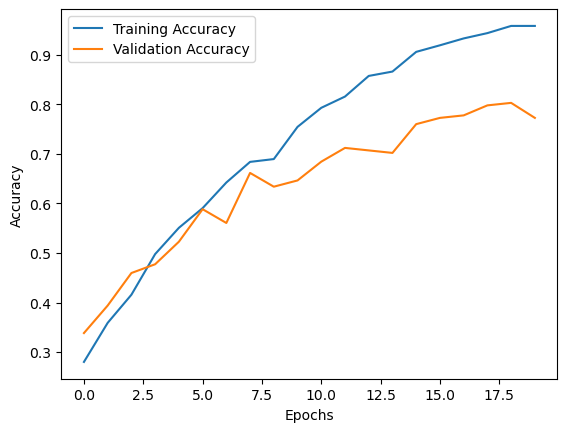

In [39]:
#2 First graph
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_directory = 'DogImages'

#load images
train_dataset = image_dataset_from_directory(
    image_directory,
    image_size=(150, 150),
    batch_size=32,
    label_mode='int', 
    validation_split=0.2,
    subset='training',
    seed=123
)

val_dataset = image_dataset_from_directory(
    image_directory,
    image_size=(150, 150),
    batch_size=32,
    label_mode='int',
    validation_split=0.2,
    subset='validation',
    seed=123
)

train_dataset = train_dataset.map(lambda x, y: (x / 255.0, y))
val_dataset = val_dataset.map(lambda x, y: (x / 255.0, y))

def build_cnn_model(filter_size):
    model = Sequential()
    model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2nd Convolutional Layer: filters of size filter_size x filter_size, ReLU activation
    model.add(Conv2D(4, (filter_size, filter_size), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

#train 3x3 on 2nd conv
model_3x3 = build_cnn_model(3)
history_3x3 = model_3x3.fit(train_dataset, validation_data=val_dataset, epochs=20)

#test model
val_loss, val_accuracy = model_3x3.evaluate(val_dataset)
print(f'Validation accuracy: {val_accuracy}')

plt.plot(history_3x3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3x3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.2654 - loss: 1.3802 - val_accuracy: 0.4293 - val_loss: 1.3032
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5065 - loss: 1.1829 - val_accuracy: 0.5884 - val_loss: 1.0554
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6418 - loss: 0.9395 - val_accuracy: 0.6162 - val_loss: 0.9670
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7308 - loss: 0.7316 - val_accuracy: 0.6793 - val_loss: 0.9163
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7591 - loss: 0.6205 - val_accuracy: 0.7146 - val_loss: 0.8595
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8252 - loss: 0.5075 - val_accuracy: 0.7197 - val_loss: 0.8544
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8859 - loss: 0.3597 - val_accuracy: 0.7525 - val_loss: 0.7628
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9111 - loss: 0.2820 - val_accuracy: 0.7828 - v

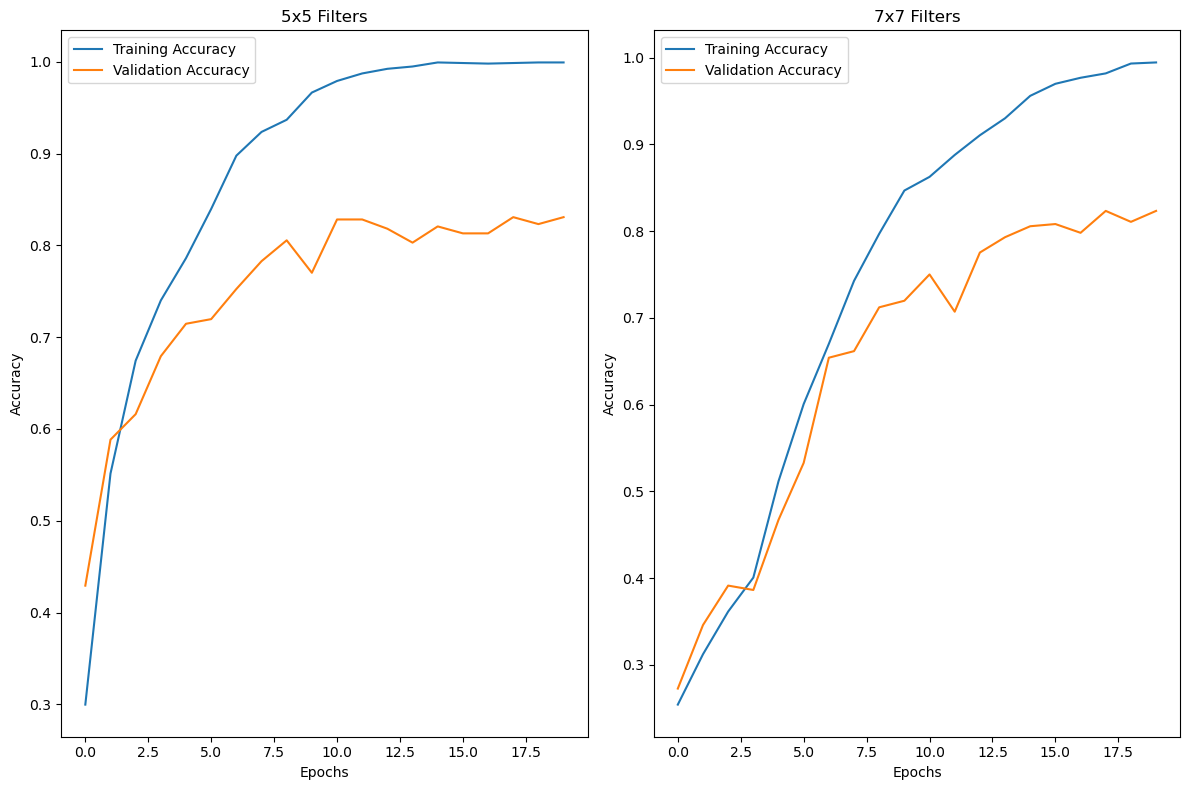

In [40]:
#2 Option A  Banner Ends in: 0032

#train 5x5 on 2nd conv
model_5x5 = build_cnn_model(5)
history_5x5 = model_5x5.fit(train_dataset, validation_data=val_dataset, epochs=20)

#train 7x7 on 2nd conv
model_7x7 = build_cnn_model(7)
history_7x7 = model_7x7.fit(train_dataset, validation_data=val_dataset, epochs=20)

val_loss_5x5, val_accuracy_5x5 = model_5x5.evaluate(val_dataset)
val_loss_7x7, val_accuracy_7x7 = model_7x7.evaluate(val_dataset)

print(f'Validation accuracy for 5x5 filters: {val_accuracy_5x5}')
print(f'Validation accuracy for 7x7 filters: {val_accuracy_7x7}')

plt.figure(figsize=(12, 8))

# plot 5x5
plt.subplot(1, 2, 1)
plt.plot(history_5x5.history['accuracy'], label='Training Accuracy')
plt.plot(history_5x5.history['val_accuracy'], label='Validation Accuracy')
plt.title('5x5 Filters')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# plot 7x7
plt.subplot(1, 2, 2)
plt.plot(history_7x7.history['accuracy'], label='Training Accuracy')
plt.plot(history_7x7.history['val_accuracy'], label='Validation Accuracy')
plt.title('7x7 Filters')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


From looking at the three graphs the accuracy of the 3x3 is by far the worst. My guess is that the model is too simple to accurately fit the model and is underfitting. 

The 5x5 graph is very accurate with early epochs but later it has a large gap between training and validation which makes me think it is overfitting. 

The 7x7 is very similiar to the 5x5 graph and is probably also overfitting. However, the accuracy is closer for more epochs than the 5x5 so I think it is the closest fit. 

In [41]:
import json
from transformers import BertTokenizer
from transformers import BertModel
import torch

with open('student_32/train.json', 'r') as file:
    data = [json.loads(line) for line in file]

df = pd.DataFrame(data)
tweets = df['Tweet'].tolist()

# load bert
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

max_length = 64

encoded_inputs = tokenizer(tweets, padding=True, truncation=True, max_length=max_length, return_tensors="pt")

model = BertModel.from_pretrained('bert-base-uncased')

with torch.no_grad():
    outputs = model(**encoded_inputs)
    last_hidden_states = outputs.last_hidden_state

print("Shape of last hidden states: ", last_hidden_states.shape)

tweet_embeddings = last_hidden_states.mean(dim=1)
print("Shape of tweet embeddings: ", tweet_embeddings.shape)


Shape of last hidden states:  torch.Size([3000, 62, 768])
Shape of tweet embeddings:  torch.Size([3000, 768])


In [ ]:
#3
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from torch.nn import BCEWithLogitsLoss
from tqdm import tqdm

data = pd.read_json('student_32/train.json', lines=True)

class MultiLabelDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts[index]
        labels = self.labels[index]

        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(labels, dtype=torch.float)
        }


texts = data['Tweet'].tolist()
labels = data.iloc[:, 2:].values

# split data into train and validation
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

train_dataset = MultiLabelDataset(train_texts, train_labels, tokenizer, max_length)
val_dataset = MultiLabelDataset(val_texts, val_labels, tokenizer, max_length)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

optimizer = AdamW(model.parameters(), lr=5e-5)

#loss
criterion = BCEWithLogitsLoss()

#GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

#training
epochs = 5
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    model.train()
    train_loss = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    print(f'Training loss: {avg_train_loss}')

    #validation
    model.eval()
    val_loss = 0
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = criterion(outputs.logits, labels)
            val_loss += loss.item()

            preds = torch.sigmoid(outputs.logits).cpu().numpy()
            predictions.extend(preds)
            true_labels.extend(labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    print(f'Validation loss: {avg_val_loss}')

    predictions = np.array(predictions) >= 0.5

    #metrics
    acc = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='micro')

    print(f'Validation Accuracy: {acc}')
    print(f'Validation F1 Score: {f1}')



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\mvoen\anaconda3\envs\visual_analytics\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5


100%|██████████| 150/150 [09:28<00:00,  3.79s/it]


Training loss: 0.4226521744330724


100%|██████████| 38/38 [00:43<00:00,  1.14s/it]


Validation loss: 0.3527683192177823
Validation Accuracy: 0.21
Validation F1 Score: 0.6192229038854806
Epoch 2/5


100%|██████████| 150/150 [10:04<00:00,  4.03s/it]


Training loss: 0.31174552688996


100%|██████████| 38/38 [00:43<00:00,  1.14s/it]


Validation loss: 0.3250246244041543
Validation Accuracy: 0.25166666666666665
Validation F1 Score: 0.6402266288951841
Epoch 3/5


100%|██████████| 150/150 [09:35<00:00,  3.83s/it]


Training loss: 0.2549156496922175


100%|██████████| 38/38 [00:39<00:00,  1.05s/it]


Validation loss: 0.32748156746751383
Validation Accuracy: 0.25
Validation F1 Score: 0.6387893269613699
Epoch 4/5


100%|██████████| 150/150 [09:08<00:00,  3.66s/it]


Training loss: 0.2119414096077283


100%|██████████| 38/38 [00:39<00:00,  1.04s/it]


Validation loss: 0.33590180858185414
Validation Accuracy: 0.23833333333333334
Validation F1 Score: 0.6480314960629922
Epoch 5/5


100%|██████████| 150/150 [09:22<00:00,  3.75s/it]


Training loss: 0.17511059353748956


100%|██████████| 38/38 [00:38<00:00,  1.02s/it]

Validation loss: 0.34915845370606374
Validation Accuracy: 0.23833333333333334
Validation F1 Score: 0.6553059643687065


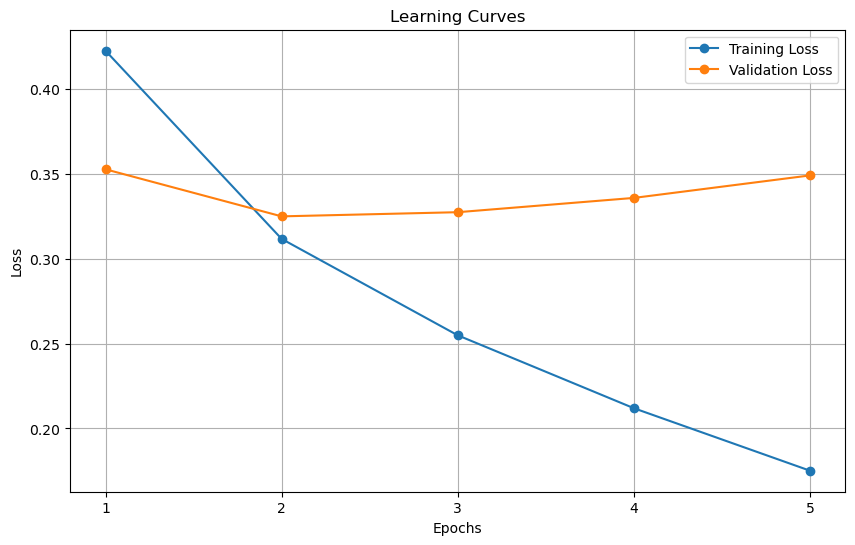

In [ ]:
#3 Graph
train_losses = [0.4226521744330724, 0.31174552688996, 0.2549156496922175, 0.2119414096077283,0.17511059353748956 ]
val_losses = [0.3527683192177823, 0.3250246244041543, 0.32748156746751383, 0.33590180858185414, 0.34915845370606374]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(train_losses) + 1))
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#3 test accuracy
test_data = pd.read_json('student_32/test.json', lines=True)

test_texts = test_data['Tweet'].tolist()
test_labels = test_data.iloc[:, 2:].values 

#test data
test_dataset = MultiLabelDataset(test_texts, test_labels, tokenizer, max_len)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model.eval()
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.sigmoid(outputs.logits).cpu().numpy() >= 0.5

        all_predictions.extend(preds.tolist())
        all_true_labels.extend(labels.cpu().numpy().tolist())

all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)

#all labels match
exact_match_count = np.sum(np.all(all_predictions == all_true_labels, axis=1))
total_count = len(all_true_labels)
test_accuracy = exact_match_count / total_count

print(f'Test Accuracy (Exact Match): {test_accuracy:.4f}')


100%|██████████| 94/94 [01:24<00:00,  1.11it/s]

Test Accuracy (Exact Match): 0.2433


In [ ]:
#3 one label matches
match_count = np.sum(np.any(all_predictions & all_true_labels, axis=1))
total_count = len(all_true_labels)
test_accuracy_one_label = match_count / total_count

print(f'Test Accuracy (At Least One Label Matches): {test_accuracy_one_label:.4f}')


Test Accuracy (At Least One Label Matches): 0.8687
